In [7]:
from numpy.linalg import norm
import numpy as np
import pandas as pd

In [8]:
class fuzzyCMeans:
    k = None
    m = None
    d = None
    N = None
    X = None
    epocas = 10
    W = None
    center = None
    y = None
    
    def __init__(self, X, k, m = 1.0):
        self.X = np.asarray(X)
        self.k = k
        self.m = m
        self.N = len(X)        
        self.d = len(X[0])
        
    def fit(self):
        self.W = np.random.random((self.N, self.k))
        
        for r in range(self.epocas):          
            self.center = []
            
            for i in range(self.k):
                self.center.append(self.calcCenter(i))
                
            self.center = np.asarray(self.center)
            
            for i in range(self.N):
                for j in range(self.k):
                    denominator = 0
                    
                    if(self.m == 1):
                        power = np.inf
                    else:
                        power = 2 / (self.m - 1.0)
                    
                    for k in range(len(self.center)):
                        denominator += (norm(self.X[i] - self.center[j]) / norm(self.X[i] - self.center[k]))**power
                    
                    self.W[i, j] = 1.0 / denominator
        
        self.y = np.argmin(self.W, axis = 1)
        
        
    def calcCenter(self, c):
        numerator = 0
        denominator = 0
        
        for i in range(self.N):
            numerator += (self.W[i, c]**self.m) * self.X[i, :]
            denominator += self.W[i, c]**self.m
        
        return numerator / denominator
            
    def predict(self):
        return self.y

In [9]:
dataset = pd.read_csv("datos.csv", sep = "\t", header = None)

In [10]:
X = dataset.loc[:, :1]
y = np.asarray(dataset.loc[:, 2])

In [13]:
FCM = fuzzyCMeans(X, 3, 0.8)
FCM.fit()
y_pred = FCM.predict()

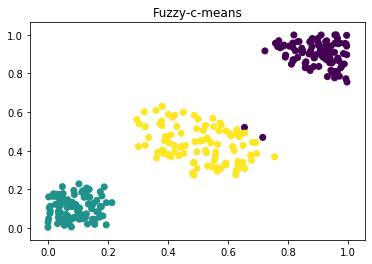

ARI:  0.9800680223095938


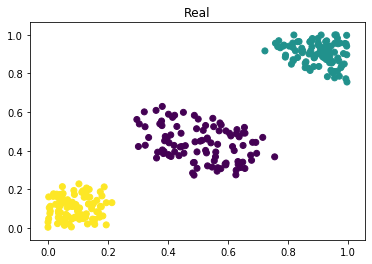

In [21]:
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
X = np.asarray(X)


plt.title("Fuzzy-c-means")
plt.scatter(X[:, 0], X[:, 1], c = y_pred)
plt.show()
print("ARI: ", adjusted_rand_score(y, y_pred))

plt.title("Real")
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()


